In [1]:
#Load all required library

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
#Setting up the working directory

os.chdir("E:\\PGP AIML\\Projects\\Unsupervised Learning\\Project 1")

In [3]:
#Reading the data file

df = pd.read_csv("cars-dataset.csv")

In [4]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
df.describe(include = 'all').transpose()

#Missing or wrong values in hp column that need to be imputed

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


In [6]:
#Checking data types

df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [7]:
#Checking null values

df.isnull().sum()

#No null values

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [8]:
df['hp'].value_counts()

#There is a '?' present in hp column data

150    22
90     20
88     19
110    18
100    17
75     14
95     14
70     12
67     12
105    12
65     10
85      9
97      9
145     7
140     7
80      7
84      6
68      6
92      6
?       6
72      6
78      6
86      5
180     5
170     5
115     5
60      5
175     5
130     5
71      5
       ..
94      1
167     1
66      1
133     1
93      1
152     1
103     1
61      1
149     1
142     1
108     1
132     1
137     1
220     1
77      1
107     1
138     1
54      1
200     1
116     1
158     1
210     1
49      1
208     1
230     1
193     1
64      1
122     1
91      1
82      1
Name: hp, Length: 94, dtype: int64

In [9]:
len(df[(df['hp'] == '?')])

6

In [10]:
df['hp'] = df['hp'].replace('?', np.nan)

# Replacing ? with NaN so we can replace it with median

In [11]:
df['hp'].isnull().sum()

6

In [12]:
df['hp'] = df['hp'].fillna(df['hp'].median(skipna = True))

#Replaced '?' in hp column with median

In [13]:
df['hp'].isnull().sum()

0

In [14]:
df.hp = df.hp.astype(float)

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


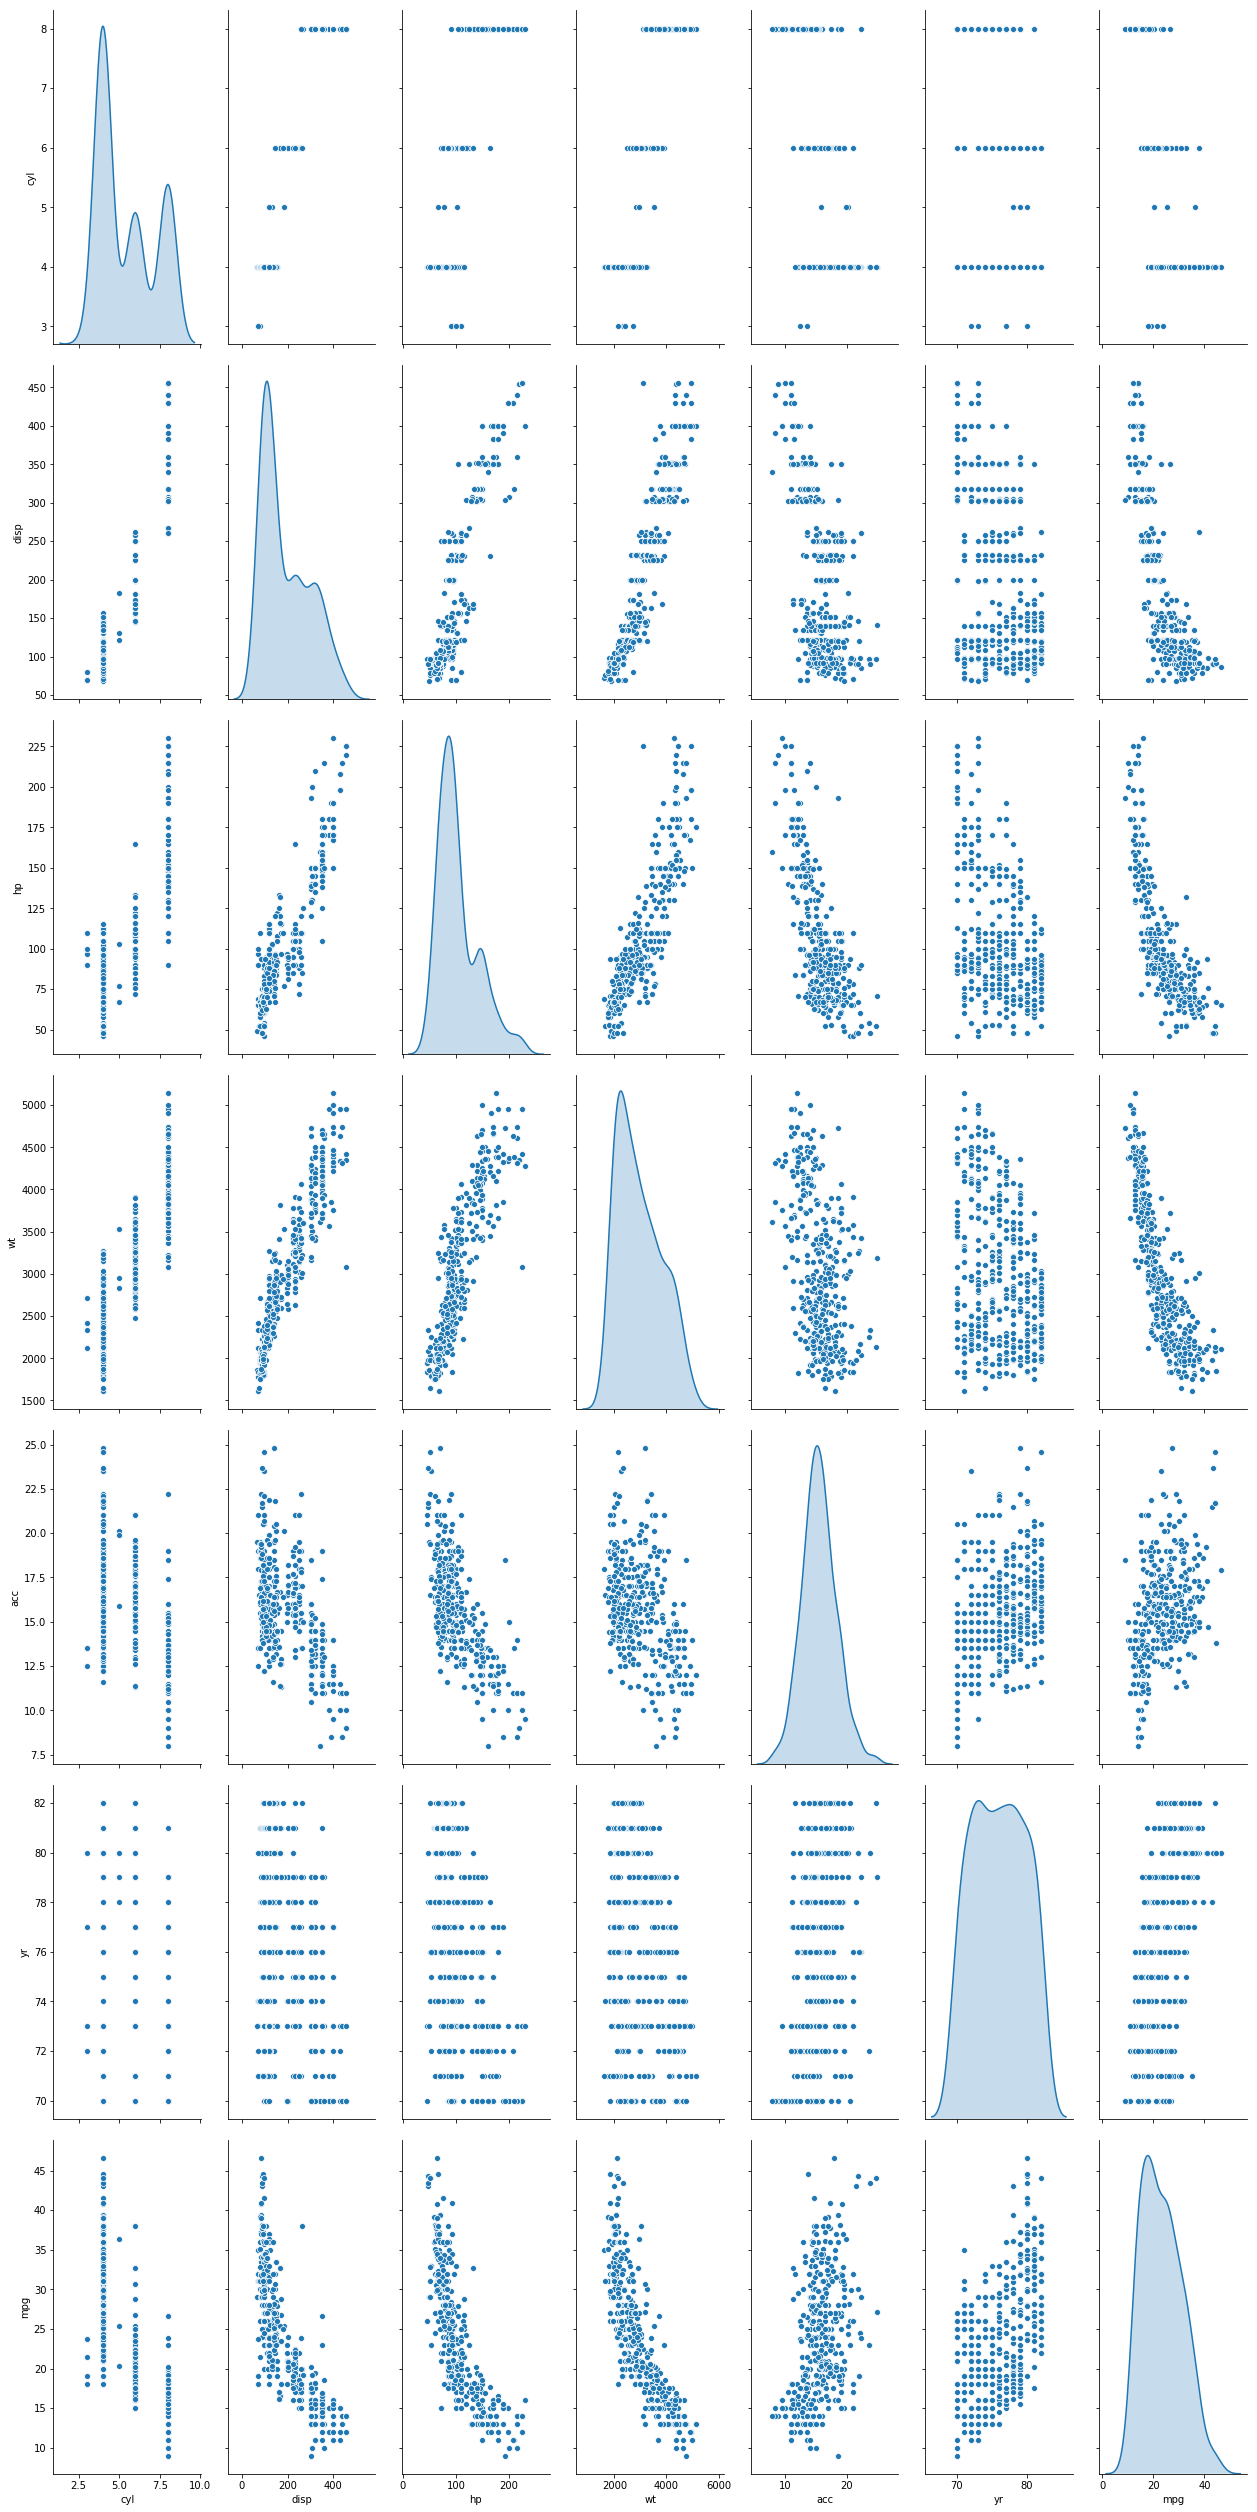

In [15]:
#Pair Plot

sns.pairplot(df, size=5,aspect=0.5,diag_kind='kde')

In [16]:
df2 = df.drop(['car name'], axis=1)

#Dropping car name column as we don't need it for clustering

In [17]:
#Standardizing data using zscore

from scipy import stats
from scipy.stats import zscore

df2 = df2.apply(zscore)

In [18]:
df2.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [19]:
distortion = pd.DataFrame(columns=['K','SSE'])

#Creating an empty data frame to store SSE values for each k

In [20]:
from sklearn.cluster import KMeans

for i in range(1,10):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=100)
    
    #Fit on the data
    km.fit(df2)
    
    #Add cluster information for each record in dataframe
    df2['k_' + str(i)] = km.predict(df2)
    
    #Track K and SSE information in sse_df
    distortion.loc[distortion.shape[0]] = [i, km.inertia_]

In [21]:
distortion

,K,SSE
0,1.0,2786.000000
1,2.0,1294.841895
2,3.0,951.330975
3,4.0,782.830652
4,5.0,705.098044
5,6.0,635.739099
6,7.0,598.760006
7,8.0,559.532643
8,9.0,528.251219


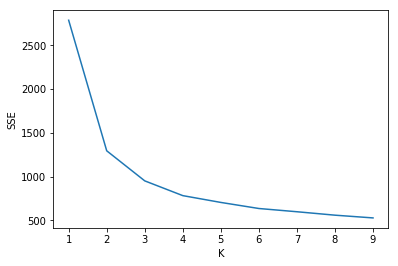

In [22]:
sns.lineplot(x='K', y='SSE', data=distortion)

In [23]:
#By looking at the elbow curve, optimal value of K is 4
#Decrease in error from 4 to 5 is minimum

In [24]:
#Creating 4 clusters

km2 = KMeans(n_clusters=4)

In [25]:
df3 = df.drop(['car name'], axis=1)

In [26]:
#Standardizing data using zscore

from scipy import stats
from scipy.stats import zscore

df3 = df3.apply(zscore)

In [27]:
df3.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [28]:
km2.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
centroids = pd.DataFrame(km2.cluster_centers_)

In [30]:
centroids

,0,1,2,3,4,5,6
0,-0.862091,-0.809058,-0.560765,-0.762535,0.320559,-0.618623,0.216287
1,1.498191,1.503923,1.521683,1.404098,-1.086149,-0.688324,-1.163797
2,-0.824503,-0.780427,-0.742380,-0.765255,0.384478,1.124326,1.194116
3,0.424430,0.305303,-0.037758,0.337765,0.293670,0.032986,-0.496827


In [31]:
centroids.columns = df3.columns

In [32]:
centroids.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.862091,-0.809058,-0.560765,-0.762535,0.320559,-0.618623,0.216287
1,1.498191,1.503923,1.521683,1.404098,-1.086149,-0.688324,-1.163797
2,-0.824503,-0.780427,-0.742380,-0.765255,0.384478,1.124326,1.194116
3,0.424430,0.305303,-0.037758,0.337765,0.293670,0.032986,-0.496827


In [33]:
df3['Cluster'] = km2.predict(df3)

#Adding cluster label into the dataset

In [34]:
df3.head()

,cyl,disp,hp,wt,acc,yr,mpg,Cluster
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,1


In [35]:
df3['Cluster'].value_counts()

2    111
0    102
1     94
3     91
Name: Cluster, dtype: int64

In [36]:
#Bulid Regression Models for each Cluster

In [37]:
data1 = df3[df3.Cluster == 0]
data2 = df3[df3.Cluster == 1]
data3 = df3[df3.Cluster == 2]
data4 = df3[df3.Cluster == 3]

In [38]:
#Separating data into X and y

In [39]:
X1 = data1.loc[:, data1.columns != 'mpg']
X2 = data2.loc[:, data2.columns != 'mpg']
X3 = data3.loc[:, data3.columns != 'mpg']
X4 = data4.loc[:, data4.columns != 'mpg']

In [40]:
y1 = data1['mpg']
y2 = data2['mpg']
y3 = data3['mpg']
y4 = data4['mpg']

In [41]:
data4.head()

,cyl,disp,hp,wt,acc,yr,mpg,Cluster
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-1.627426,-0.194023,3
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-1.627426,-0.706439,3
24,0.320935,0.053526,-0.374700,-0.381217,-0.206262,-1.627426,-0.322127,3
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-1.356642,-0.578335,3
34,0.320935,0.303193,0.018232,0.554017,-0.024722,-1.356642,-0.962647,3


In [42]:
#Not doing train and test split because we are just looking for coefficients

In [43]:
from sklearn.linear_model import LinearRegression  
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()
regressor4 = LinearRegression()

In [44]:
regressor1.fit(X1,y1)
regressor2.fit(X2,y2)
regressor3.fit(X3,y3)
regressor4.fit(X4,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
#Coefficients for Custer 1

Coeff1 = pd.DataFrame(np.transpose(regressor1.coef_), X1.columns)
Coeff1 = np.transpose(Coeff1)
Coeff1

,cyl,disp,hp,wt,acc,yr,Cluster
0,0.859103,-0.665138,-0.204787,-0.541138,-0.082717,0.161833,0.0


In [46]:
#Coefficients for Custer 2

Coeff2 = pd.DataFrame(np.transpose(regressor2.coef_), X2.columns)
Coeff2 = np.transpose(Coeff2)
Coeff2

,cyl,disp,hp,wt,acc,yr,Cluster
0,0.54658,-0.075263,-0.093032,-0.119222,-0.183226,0.181301,0.0


In [47]:
#Coefficients for Custer 3

Coeff3 = pd.DataFrame(np.transpose(regressor3.coef_), X3.columns)
Coeff3 = np.transpose(Coeff3)
Coeff3

,cyl,disp,hp,wt,acc,yr,Cluster
0,1.064302,-0.152392,-0.281159,-0.936962,0.110831,0.30624,0.0


In [48]:
#Coefficients for Custer 4

Coeff4 = pd.DataFrame(np.transpose(regressor4.coef_), X4.columns)
Coeff4 = np.transpose(Coeff4)
Coeff4

,cyl,disp,hp,wt,acc,yr,Cluster
0,0.184772,-0.018124,-0.147855,-0.397579,-0.062476,0.229751,0.0
